# Automobile Regression Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset: https://archive.ics.uci.edu/ml/datasets/Automobile

In [2]:
data=pd.read_csv("imports-85.data")

In [3]:
col=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
    'wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [4]:
data.columns=col

In [5]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [7]:
data['normalized-losses'].value_counts()

?      40
161    11
91      8
150     7
128     6
134     6
104     6
168     5
65      5
85      5
102     5
74      5
103     5
94      5
95      5
93      4
106     4
148     4
118     4
122     4
137     3
125     3
83      3
154     3
115     3
101     3
89      2
153     2
119     2
110     2
197     2
145     2
192     2
188     2
194     2
113     2
129     2
81      2
158     2
164     2
87      2
108     2
231     1
142     1
121     1
78      1
107     1
98      1
256     1
90      1
77      1
186     1
Name: normalized-losses, dtype: int64

In [8]:
data[data=='?']=np.nan

C:\Users\mafaz\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


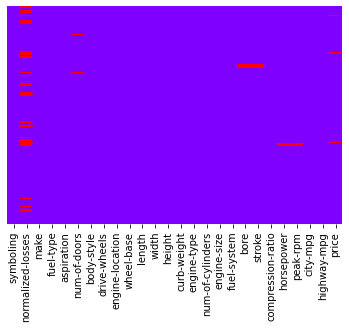

In [9]:
sns.heatmap(data.isnull(),yticklabels=False, cmap = "rainbow", cbar = False)

In [10]:
data.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
data['normalized-losses']=data['normalized-losses'].astype('float')

In [12]:
data['bore']=data['bore'].astype('float')

In [13]:
data['stroke']=data['stroke'].astype('float')

In [14]:
data['horsepower']=data['horsepower'].astype('float')

In [15]:
data['peak-rpm']=data['peak-rpm'].astype('float')

In [16]:
data['price']=data['price'].astype('float')

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data.iloc[:, [1,18,19,21,22,25]] = imputer.fit_transform(data.iloc[:, [1,18,19,21,22,25]])

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data.iloc[:, [5]] = imputer.fit_transform(data.iloc[:, [5]])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [20]:
data=pd.get_dummies(data)

In [21]:
data.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_diesel',
       'fuel-type_gas', 'aspiration_std', 'aspiration_turbo',
       'num-of-doors_four', 'num-of-doors_two', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_front', 'engine-location_rear',
       'eng

In [22]:
X=data.drop(['price'],axis=1).values
y=data['price']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.9615689538896163

In [25]:
regressor.score(X_test,y_test)

0.9052876264398461

In [26]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
DTR.score(X_train, y_train)

0.999863230232131

In [27]:
DTR.score(X_test,y_test)

0.9016364524289867

In [30]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=50)
RFR.fit(X_train, y_train)
RFR.score(X_train, y_train)

0.9711796378951341

In [31]:
RFR.score(X_test,y_test)

0.9314248996368338